In [93]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

### one dimensional gaussians

In [9]:
def gaussianPDF(mu, sigma, x):
    return 1./ math.sqrt(2. * math.pi) * math.exp(-((x - mu)**2)/ (2. * sigma ** 2) )

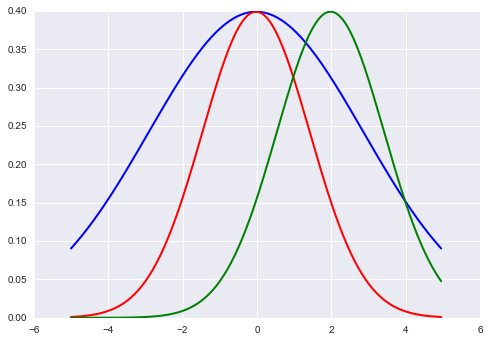

In [31]:
samples = np.arange(-5., 5., .05)
plt.figure()
mu = np.average(samples)
sigma = np.std(samples)

plt.plot(samples, [gaussianPDF(mu, sigma,x) for x in samples], lw=2., color='blue')
plt.plot(samples, [gaussianPDF(mu, sigma/2.0 , x) for x in samples], lw=2., color='red')
plt.plot(samples, [gaussianPDF(mu+2.0, sigma/2.0, x) for x in samples], lw=2., color='green')

plt.show()

### two dimensional gaussians

In [75]:
def gaussianPDF_2D(mu, Sigma, x):
    denominator = 1. / math.sqrt(np.linalg.det(2. * math.pi * Sigma))
    numerator = np.exp( -0.5 * np.dot(np.dot((x - mu).T, np.linalg.inv(Sigma)), (x - mu)))
    return float(numerator/denominator)                  

In [76]:
Sigma = np.array([[1, 0],[0,1]], dtype=float)
mu = np.array([0.,0.])
gaussianPDF_2D(mu, Sigma, np.array([0.,0.]))

6.283185307179585

In [77]:
x = np.arange(-5., 5., .05)
y = np.arange(-5., 5., .05)
X, Y  = np.meshgrid(x,y)
print x.shape
print X.shape

(200,)
(200, 200)


In [78]:
Z = np.zeros(X.shape)
nx, ny = X.shape
for i in xrange(nx):
    for j in xrange(ny):
        Z[i,j] = gaussianPDF_2D(mu, Sigma, np.array([X[i,j], Y[i,j]]))

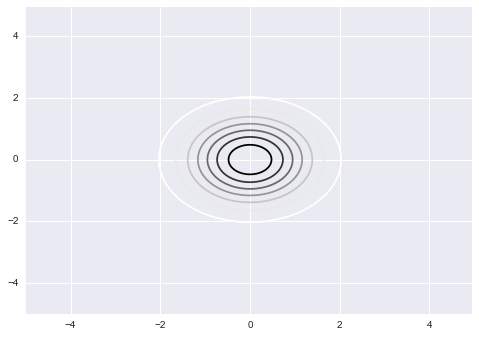

In [79]:
plt.figure(2)
plt.contour(X, Y, Z)

In [97]:
def plot_gaussianPDF_2D(X, Y, Z):
    fig = plt.figure(3)
    ax = Axes3D(fig)
    ax.plot_surface(X, Y, Z)
    
def plot_gaussianPDF_2D_1(mu_, Sigma_, X_, Y_):
    Z_ = np.zeros(X_.shape)
    nx, ny = X_.shape
    for i in xrange(nx):
        for j in xrange(ny):
            Z_[i,j] = gaussianPDF_2D(mu_, Sigma_, np.array([X_[i,j], Y_[i,j]]))
    plot_gaussianPDF_2D(X_, Y_, Z_)


In [98]:
mu1 = np.array([1.5, 2.])
Sigma1 = np.array([[2., 1.],[1., 2.]])

mu2 = np.array([0., -1.])
Sigma2 = np.array([[1., -.5],[-.5, 1.]])

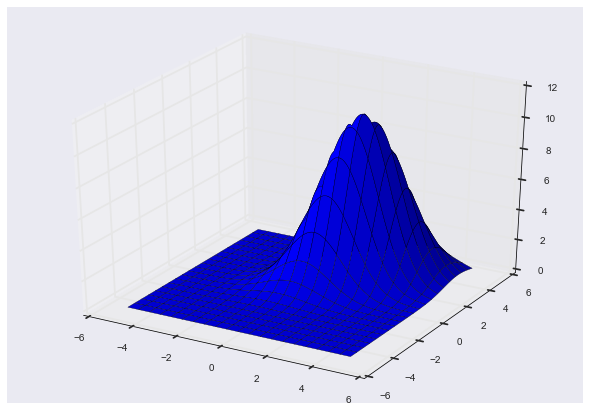

In [99]:
plot_gaussianPDF_2D_1(mu1, Sigma1, X, Y)

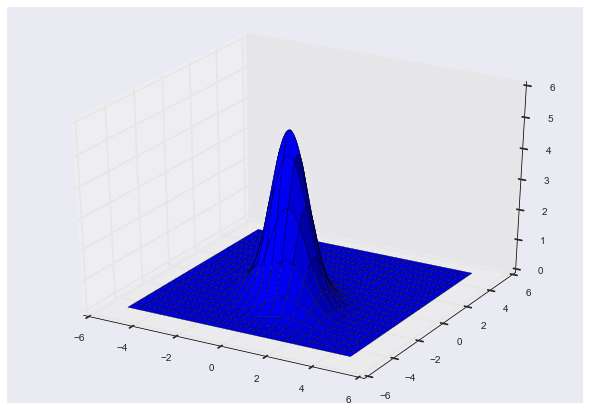

In [100]:
plot_gaussianPDF_2D_1(mu2, Sigma2, X, Y)

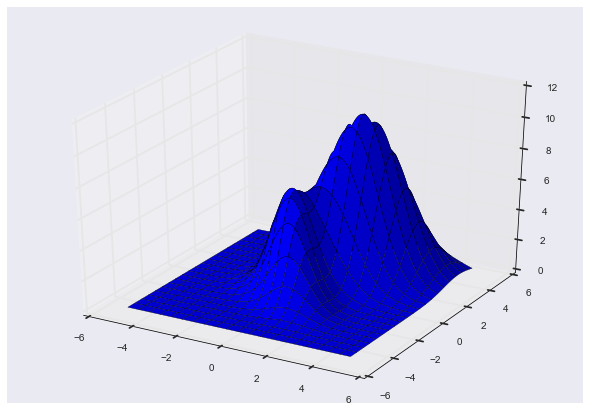

In [101]:
Z2 = np.zeros(X.shape)
nx, ny = X.shape
for i in xrange(nx):
    for j in xrange(ny):
        Z2[i,j] = gaussianPDF_2D(mu1, Sigma1, np.array([X[i,j], Y[i,j]])) + gaussianPDF_2D(mu2, Sigma2, np.array([X[i,j], Y[i,j]]))
plot_gaussianPDF_2D(X, Y, Z2)